### Goal

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd

import matplotlib.pyplot as plt

import plotting as plotting

### TODO: update this path

In [3]:
root = "/Users/michaelmoret/tinyverse/krap/data/24-12-09/single/"

### From here; automatic run

In [4]:
for file in os.listdir(root):
    if file.endswith(".txt"):
        print(file)

20241209$IHNY$25^pk30 phosctrl$25^pk30 0.01$25^pk30 0.03$25^pk30 0.05$single.txt
20241209$IHNY$25^AActrl$25^pys 0.01$25^pys 0.03$25^pys 0.05$single.txt


In [5]:
savepath = f"{root}plots/"
os.makedirs(savepath, exist_ok=True)

In [6]:
all_dfs = []
for file in os.listdir(root):
    if file.endswith(".txt"):
        print(file)
        df = plotting.get_df_from_file(root + file,
                                       skip=10)

        # clean the df
        if "single" in file:
            df = plotting.clean_single(df)
        elif "triple" in root:
            df = plotting.clean_triple(df)
        else:
            raise ValueError("Unknown type of experiment")

        splitted_name = file.split("$")
        # get the experiments; i.e. not the date
        # not the single or triple etc
        splitted_name = splitted_name[2:-1]
        # add the experiment name in the dataframe
        all_names = []
        for entries in splitted_name:
            times_name = entries.split("^")
            _times = int(times_name[0])
            _name = times_name[1]
            all_names += [_name] * _times
        df["Name"] = all_names
        # remove nan
        df = df.dropna()
        all_dfs.append(df)
        
# merge df
df_merged = pd.concat(all_dfs)
df_merged.head(5)

20241209$IHNY$25^pk30 phosctrl$25^pk30 0.01$25^pk30 0.03$25^pk30 0.05$single.txt
20241209$IHNY$25^AActrl$25^pys 0.01$25^pys 0.03$25^pys 0.05$single.txt


,RECORD,MEAN AREA,ESTIMATED_LENGTH(*),GRADIENT(*),EMOD(*)(#),DECRIMPING_WORK,EXTENSION_WORK,START_X(*),START_Y,END_X(*),END_Y,ANALYSIS_WORK,BREAK_STRAIN(*)(#),BREAK_LOAD,TENSILE_STRENGTH,Name
0,1.0,3986.6,30.36,0.6437,4.902000e+09,6.401000e-07,0.008375,0.2306,10.83,0.8893,42.94,0.000022,53.557,0.6710,168.3,pk30 phosctrl
1,2.0,3490.9,30.07,0.5850,5.039000e+09,0.000000e+00,0.007714,0.2328,17.28,0.8314,46.93,0.000020,52.511,0.6632,190.0,pk30 phosctrl
2,3.0,2401.4,30.47,0.4316,5.477000e+09,0.000000e+00,0.005741,0.2626,27.17,0.8861,61.48,0.000020,54.513,0.4675,194.7,pk30 phosctrl
3,4.0,6132.4,30.24,1.1490,5.664000e+09,5.102000e-07,0.010310,0.2646,15.76,0.8598,49.03,0.000036,41.964,1.0330,168.5,pk30 phosctrl
4,5.0,3513.1,30.06,0.6460,5.528000e+09,1.202000e-07,0.007473,0.2329,15.78,0.8649,50.13,0.000022,50.599,0.6480,184.4,pk30 phosctrl


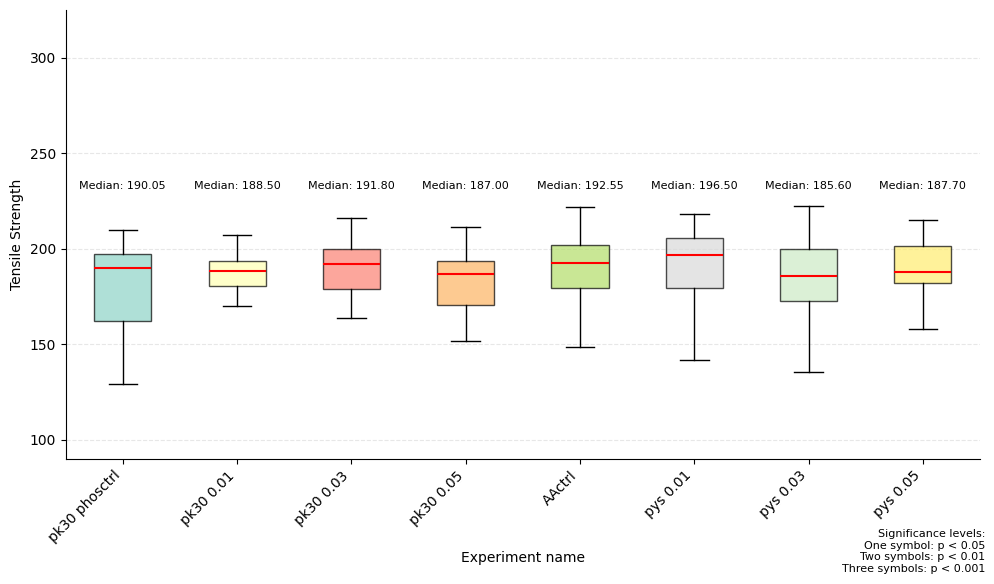

In [7]:
header = 'TENSILE_STRENGTH'
ymin = 90
ymax = 325
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

Control check

In [8]:
unique_names = df_merged['Name'].unique()
for name in unique_names:
    median_tensile_strength = df_merged[df_merged['Name'] == name]['TENSILE_STRENGTH'].median()
    print(f"Median TENSILE_STRENGTH for {name}: {median_tensile_strength}")


Median TENSILE_STRENGTH for pk30 phosctrl: 190.05
Median TENSILE_STRENGTH for pk30 0.01: 188.5
Median TENSILE_STRENGTH for pk30 0.03: 191.8
Median TENSILE_STRENGTH for pk30 0.05: 187.0
Median TENSILE_STRENGTH for AActrl: 192.55
Median TENSILE_STRENGTH for pys 0.01: 196.5
Median TENSILE_STRENGTH for pys 0.03: 185.6
Median TENSILE_STRENGTH for pys 0.05: 187.7


In [9]:
len(df_merged)

196

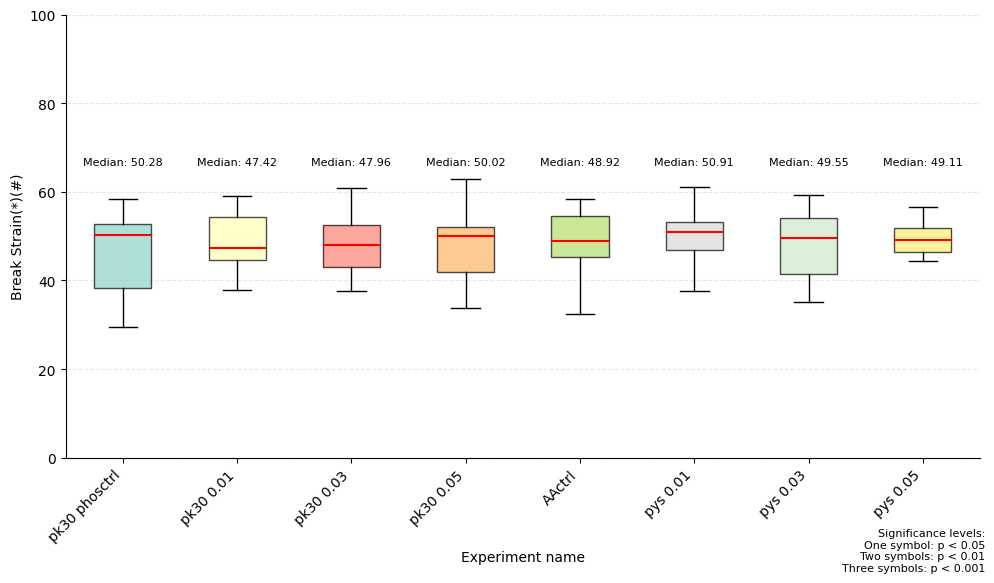

In [10]:
header = 'BREAK_STRAIN(*)(#)'
ymin = 0
ymax = 100
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

Statistical significance between pk30 phosctrl and pk30 0.03: p = 0.0338
Statistical significance between pk30 phosctrl and pys 0.05: p = 0.0410


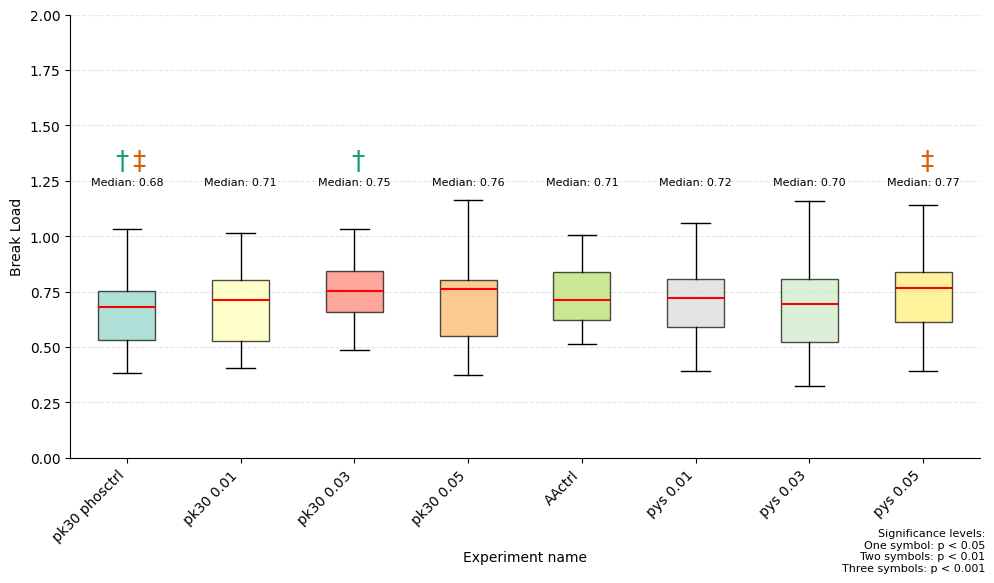

In [11]:
header = 'BREAK_LOAD'
ymin = 0
ymax = 2.0
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()